### QUIZ. Критерии Стьюдента

### Задача 1

Пусть t  — значение статистики критерия Стьюдента для независимых выборок, nu  —  соответствующее число степеней свободы. Какая из строчек кода вычисляет достигаемый уровень значимости t-критерия при альтернативе $H_1\colon \mu_1>\mu_2$?

In [1]:
from scipy.stats import t
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


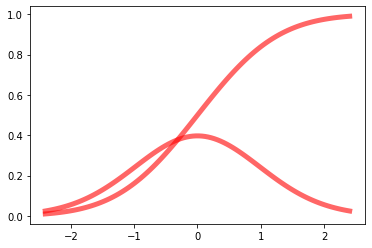

In [22]:
df = 50
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
plot(x, t.cdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')
plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')

In [28]:
t.cdf(-2, df)

0.025473534368846633

In [26]:
t.pdf(-2, df)

0.05577415164980036

### Задача 2

Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [93]:
from scipy.stats import norm

distr = norm(loc = 9.5, scale = 0.4)
z = norm.ppf(0.975) # для alpha = 5

In [38]:
# Тогда 95% доверительный интервал составляет mu +- z * sigma
left_bound = 9.5 - z*0.4
right_bound = 9.5 + z*0.4

print('95% доверительный интервал для уровня кальция в крови здоровых молодых женщин составляет', 
      f'[{round(left_bound, 4)} - {round(right_bound,4)}]')

95% доверительный интервал для уровня кальция в крови здоровых молодых женщин составляет [8.716 - 10.284]


Т.е. среднее значение по выборке из 160 здоровых беременных женщин Гватемалы входит в этот интервал. Уже на этом основании можно полагать, что средний уровень кальция в этой популяции не отличается.

$H_0$: среднее значение по выборке из 160 здоровых беременных женщин не отличается от 9.5. $\mu_1 = \mu_0$ \
$H_1$: отличается (будем считать для двухсторонней альтернативы)

Применим Z-критерий и посчитаем статистику
$$ Z (X_n) = \frac{\bar{X}_n - \mu_0}{\frac{\sigma}{\sqrt{n}}}$$ 

In [94]:
z = (9.57 - 9.5)/(0.4/sqrt(160))
z

2.213594362117875

In [98]:
# Посчитаем p-value. Вероятность получить такую или еще более выраженную статистику (с 2-х сторон) при нормальном распределении
distr_2 = norm()
p_val = 2*(1-distr_2.cdf(abs(z)))
round(p_val, 4)

0.0269

### Задача 3

Имеются данные о стоимости и размерах 53940 бриллиантов:\
Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1).\
На обучающей выборке настройте две регрессионные модели:

 - линейную регрессию с помощью LinearRegression без параметров
 - случайный лес из 10 деревьев с помощью RandomForestRegressor с random_state=1.
 
Какая из моделей лучше предсказывает цену бриллиантов?\
Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен.\
Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости.\
Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости $\alpha=0.05$?

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [56]:
# Загружаем данные
data = pd.read_csv('diamonds.txt', sep = '\t')
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [58]:
# Отделяем целевую переменную
y = data.price
X = data.drop(columns = 'price')

In [59]:
# Делим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [60]:
# Создаем регрессионные модели с параметрами по заданию
lin_reg = LinearRegression().fit(X_train, y_train)
for_reg = RandomForestRegressor(n_estimators=10, random_state=1).fit(X_train, y_train)

In [61]:
print('Оценка качества линейной регрессии:', lin_reg.score(X_train, y_train))
print('Оценка качества random forest:', for_reg.score(X_train, y_train))

Оценка качества линейной регрессии: 0.8584248120456783
Оценка качества random forest: 0.9761542255412049


На обучающей выборке случайный лес дает более точную оценку

In [62]:
# Посчитаем предсказания для обоих моделей
lin_predict = lin_reg.predict(X_test)
for_predict = for_reg.predict(X_test)

In [70]:
# Посчитаем модули разностей
lin_dif = list(map(abs, lin_predict - y_test))
for_dif = list(map(abs, for_predict - y_test))

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

In [77]:
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Svetlana\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


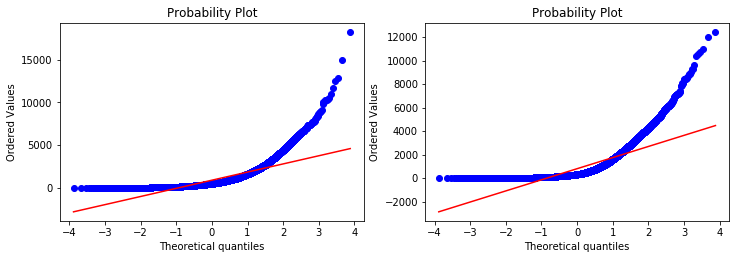

In [78]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(lin_dif, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(for_dif, dist="norm", plot=pylab)
pylab.show()

Очевидно, что оба распределения модулей разности предсказаний отличаются от нормального

In [79]:
# Посчитаем критерии Шапиро-Уилка
print("Shapiro-Wilk normality test, W-statistic (linear): %f, p-value: %f" % stats.shapiro(lin_dif))
print("Shapiro-Wilk normality test, W-statistic (random forest): %f, p-value: %f" % stats.shapiro(for_dif))

Shapiro-Wilk normality test, W-statistic (linear): 0.674762, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic (random forest): 0.673215, p-value: 0.000000


C:\Users\Svetlana\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


К сожалению критерий Шапиро-Уилка не может быть применен к достаточно большим выборкам (больше 100). Поэтому, в нашем случае ему доверять нельзя

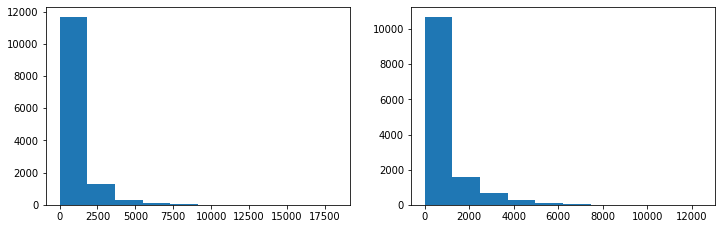

In [104]:
# Построим гистограммы и убедимся, что распределения далеки от нормальных
figure(figsize=(12,8))
subplot(2,2,1)
hist(lin_dif)
subplot(2,2,2)
hist(for_dif)
show()

# P.S. При использовании pylab не надо его явно указывать, как pyplot при вызове matplotlib

In [99]:
# Посчитаем t-критерий для связанных выборок
stats.ttest_rel(lin_dif, for_dif)

Ttest_relResult(statistic=13.017729783878663, pvalue=1.6551745751391754e-38)

In [100]:
# Вот так в решении в тесте
stats.ttest_rel(abs(y_test - lin_reg.predict(X_test)), 
                abs(y_test - for_reg.predict(X_test)))

Ttest_relResult(statistic=13.017729783878663, pvalue=1.6551745751391754e-38)

__Комментарий__
Не понимаю, почему мы используем t-критерий, если точно известно, что выборки далеки от нормальных

Нашла на форуме ответ от преподавателей, что надо смотреть не распределение разностей между реальными данными и предсказаниями, а распределение по "разности разностей". На этом основании можно применять t-критерий. Построим qq-plot

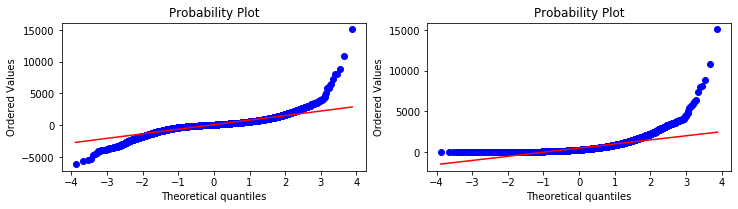

In [121]:
figure(figsize=(12,6))
subplot(2,2,1)
stats.probplot(np.array(lin_dif)-np.array(for_dif), dist="norm", plot=pylab)
subplot(2,2,2)
stats.probplot(abs(np.array(lin_dif)-np.array(for_dif)), dist="norm", plot=pylab)
show()

Я бы все равно сказала, что распределение отличается от нормального.

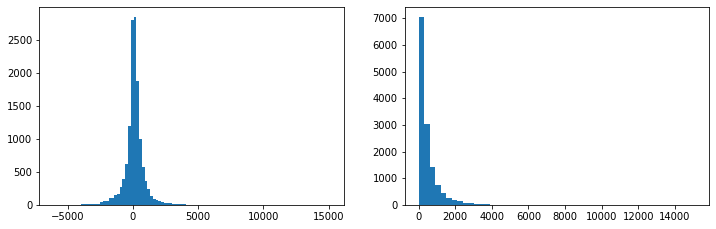

In [124]:
# Построим гистограммы и убедимся, что распределения далеки от нормальных
figure(figsize=(12,8))
subplot(2,2,1)
hist(np.array(lin_dif)-np.array(for_dif), bins = 100)
subplot(2,2,2)
hist(abs(np.array(lin_dif)-np.array(for_dif)), bins = 50)
show()

Т.е. все таки "разность разностей" без модуля похожа на нормальное распределение.

### Задача 4

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [110]:
from statsmodels.stats.weightstats import *

In [117]:
cm = DescrStatsW((np.array(lin_dif) - np.array(for_dif)))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_mean())

95% confidence interval: [74.287245, 100.624521]


__Комментарий__:\
Округлять надо нижний интервал до ближайшего целого десятка. Т.е. ответом будет 70.

__Комментарий_2__:\
Удивительно, но DescrStatsW.tconfint_mean() считает одинаковый для любой разности степеней свободы ddof (и для 0 и для 160)

## Quiz. Параметрические критерии

### Задача 1

В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате. 

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён. 

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

__Комментарий__\
Попробуем рассчитать z-критерий для разности долей для независимых выборок. Нас будет интересовать односторонняя альтернатива - зевота заразительна.

нулевая гипотеза: $H_0$ : $p_1 = p_2$;\
альтернатива: $H_1$ : $p_1 > p_2$;


 Исход | $X_1$ | $X_2$  
 ------------- | ------------- | -------------|
  1  | a = 10 | b = 4
  0  | c = 24| d = 12
  $\sum$ | $n_1$ = 34| $n_2$ = 16
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$

  
$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$\


$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

In [5]:
from scipy.stats import norm
import numpy as np

In [6]:
# Напишем функцию для расчета доверительных интервалов
def proportions_diff_confint_ind(a, n1, b, n2, alpha = 0.05):    
    z = norm.ppf(1 - alpha / 2.)
    
    p1 = a / n1
    p2 = b / n2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (left_boundary, right_boundary)

In [7]:
# Напишем функцию для расчета z-статистики
def proportions_diff_z_stat_ind(a, n1, b, n2):
        
    p1 = a / n1
    p2 = b / n2 
    P = (p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1 / n1 + 1 / n2))

In [8]:
# Напишем функцию для расчета p-value (достигаемого уровня значимости)
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - norm.cdf(z_stat)

In [140]:
print("95%% Доверительный интервал для разницы долей: [%f, %f]" %proportions_diff_confint_ind(10, 34, 4, 16))

95% Доверительный интервал для разницы долей: [-0.217558, 0.305793]


Доверительный интервал содержит ноль, поэтому уверенно нельзя сказать, что разница долей в выборках существенна.

In [143]:
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(10, 34, 4, 16), 'greater'))

p-value: 0.372930


Отвергнуть нулевую гипотезу на уровне 0.05 нельзя. Значит разница в выборках не существенна, чтобы утверждать, что зевота заразительна.

### Задача 2

Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. На рисунке ниже показаны измеренные признаки (6 изменений по банкноте).

Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

 - логистическая регрессия по признакам $X_1, X_2, X_3$;
 - логистическая регрессия по признакам $X_4, X_5, X_6$.
 
Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили $5.5\times10^{-8}$, нужно ввести $8$).


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
data = pd.read_csv('banknotes.txt', sep = '\t')
data.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [9]:
data.shape

(200, 7)

In [10]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'real'], dtype='object')

In [11]:
# Разделим целевую переменную и признаки
y = data.real
X = data.drop('real', axis=1)

In [12]:
# Разделим выборку на обучающую и тестовую.
# По умолчанию train_test_split перемешивает данные, поэтому мы не будем это делать отдельно

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=1)

In [18]:
X_train[['X1', 'X2', 'X3']]

,X1,X2,X3
98,215.1,130.0,129.8
123,215.1,130.7,130.4
119,214.4,130.2,129.9
53,215.4,130.2,130.2
33,215.6,130.4,130.1
...,...,...,...
133,214.6,130.2,130.4
137,214.9,130.7,130.3
72,215.0,129.6,130.2
140,214.8,130.2,130.3


In [19]:
# Логистическая регрессия на признаках 1, 2, 3
clr_1 = LogisticRegression(solver= 'liblinear', random_state=1).fit(X_train[['X1', 'X2', 'X3']], y_train)
score_1 = clr_1.score(X_test[['X1', 'X2', 'X3']], y_test)
score_1

0.8

In [20]:
# Логистическая регрессия на признаках 4, 5, 6
clr_2 = LogisticRegression(solver= 'liblinear', random_state=1).fit(X_train[['X4', 'X5', 'X6']], y_train)
score_2 = clr_1.score(X_test[['X4', 'X5', 'X6']], y_test)
score_2

0.46

По условиям задачи надо проверить одинаковы ли доли ошибочных предсказаний двух классификаторов. В первом случае это 0.2, во втором 0.54.\
Здесь мы имеем связанные выборки, потому что признаки $X_n$ относятся к одной банкноте.

нулевая гипотеза: $H_0$ : $p_1 = p_2$;\
альтернатива: $H_1$ : $p_1 \neq p_2$;

$X_1$ \ $X_2$ | 1 | 0 | $\sum$
------------- | ------------- | -------------| -------------|
  1  | e | f | e + f
  0  | g | h | g + h
  $\sum$ | e + g| f + h | n  
  
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

$$Z-статистика: Z({X_1, X_2}) = \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$$

Поскольку мы сравниваем доли ошибок, то для нас 0 - это 1, а 1 - это ноль

In [53]:
# Получим выборки 

# Получим предсказания
y_pred_1 = clr_1.predict(X_test[['X1', 'X2', 'X3']])
y_pred_2 = clr_2.predict(X_test[['X4', 'X5', 'X6']])

# Вычтем из предсказаний реальный ответ. Так мы получим 1 - там, где ошибка, а 0 - там, где верно.
y_samp_1 = abs(y_test - y_pred_1)
y_samp_2 = abs(y_test - y_pred_2)

In [54]:
# Напишем функцию для расчета доверительного интервала для связанных выборок
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample]) # 1 в первой выборке при условии, что 0 во второй
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample]) # 1 во второй выборке при условии, что 0 в первой
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [55]:
# Напишем функцию для расчета z-статистики для связанных выборок
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample]) # 1 в первой выборке при условии, что 0 во второй
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample]) # 1 во второй выборке при условии, что 0 в первой
    
    return (f - g) / np.sqrt(f + g - ((f - g)**2) / n )

In [57]:
# Для расчета p-value используем функцию из предыдущей задачи proportions_diff_z_test (двусторонняя альтернатива)

print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_rel(y_samp_1, y_samp_2)))

p-value: 0.003297


In [58]:
print("95%% Доверительный интервал для разницы долей: [%f, %f]" %proportions_diff_confint_rel(y_samp_1, y_samp_2))

95% Доверительный интервал для разницы долей: [0.059945, 0.300055]


### Задача 3

Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов. 

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки. 

нулевая гипотеза: $H_0$ : $\mu_1 = \mu_0$;\
альтернатива: $H_1$ : $\mu_1 > \mu_0$;

Будем применять z-критерий

$$ Z (X_n) = \frac{\bar{X}_n - \mu_0}{\frac{\sigma}{\sqrt{n}}}$$ 

In [61]:
mu_0 = 525
sigma = 100
n = 100
mu_1 = 541.4

In [62]:
# Снова будем использовать proportions_diff_z_test из 1 задачи
z = (mu_1 - mu_0)/(sigma/sqrt(n))

print("p-value: %f" % proportions_diff_z_test(z, alternative = 'greater'))

p-value: 0.050503


### Задача 4

Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки. 

нулевая гипотеза: $H_0$ : $\mu_1 = \mu_0$;\
альтернатива: $H_1$ : $\mu_1 > \mu_0$;

In [63]:
# Задача аналогична предыдущий, но mu_1 чуть-чуть выше.

mu_0 = 525
sigma = 100
n = 100
mu_1 = 541.5

z = (mu_1 - mu_0)/(sigma/sqrt(n))

print("p-value: %f" % proportions_diff_z_test(z, alternative = 'greater'))

p-value: 0.049471


Получается, всего $1/10$ решает, можно ли отвергнуть нулевую гипотезу.

## Quiz. Непараметрические критерии

### Вопрос 1
Какую из этих гипотез нельзя проверить с помощью критерия знаков?

 - Гипотеза о равенстве средних в двух независимых выборках
 - Гипотеза о равенстве средних в двух связанных выборках 
 - Гипотеза о равенстве среднего выборки некоторой константе
 
 __Мой ответ:__ Гипотеза о равенстве средних в двух независимых выборках

### Вопрос 2
Какую из этих гипотез о средних двух независимых выборок проверяет критерий Манна-Уитни?

 - $H_0\colon \mathbb{E}X_1 = \mathbb{E}X_2$
  против $H_1\colon\mathbb{E}X_1 <\neq> \mathbb{E}X_2$
  
 - $H_0\colon F_{X_1}(x) = F_{X_2}(x)$
 против $H_1\colon F_{X_1}(x) = F_{X_2}(x+\Delta), \Delta<\neq>0$ 

 - $H_0\colon med X_1 = med X_2$
 против $H_1\colon med X_1 <\neq> med X_2$

 - $H_0\colon P\left(X_1>X_2\right)=\frac1{2}$
 против $H_1\colon P\left(X_1>X_2\right)<\neq>\frac1{2}$
 
 __Мой ответ:__ $H_0\colon F_{X_1}(x) = F_{X_2}(x)$
 против $H_1\colon F_{X_1}(x) = F_{X_2}(x+\Delta), \Delta<\neq>0$ 

### Вопрос 3

У вас есть две регрессионные модели и двадцать наборов данных. На обучающей подвыборке каждого набора вы настраиваете обе модели и считаете среднеквадратичную ошибку на тестовой подвыборке набора. Какими из этих критериев не стоит проверять гипотезу о том, что среднее качество регрессионных моделей одинаково?

 - Перестановочный критерий со статистикой $T=\frac1{n}\sum\limits_{i=1}^n X_{1i}-\frac1{n}\sum\limits_{i=1}^n X_{2i}$ и $C_{2n}^n$ вариантами расстановки объектов по выборкам

 - Критерий знаков

 - Критерий Манна-Уитни

 - Критерий Стьюдента для двух независимых выборок

 - Критерий знаковых рангов

 - Перестановочный критерий со статистикой $T=\sum\limits_{i=1}^n \left(X_{1i}-X_{2i}\right)$ и $2^n$ вариантами расстановки знаков у попарных разностей
 
 __Мой ответ__
 
   - Критерий Манна-Уитни
   - Перестановочный критерий со статистикой $T=\frac1{n}\sum\limits_{i=1}^n X_{1i}-\frac1{n}\sum\limits_{i=1}^n X_{2i}$ и $C_{2n}^n$ вариантами расстановки объектов по выборкам
   
  - Критерий Стьюдента для двух независимых выборок
  
 Потому что это критерии для независимых выборок, а у нас зависимые

### Вопрос 4

Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков:

$49, 58, 75, 110, 112, 132, 151, 276, 281, 362^*$


Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы $H_0\colon med X = 200$ на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет. 

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

Нулевая гипотеза: $H_0$ : $med X = m_0$;\
Альтернатива: $H_1$ : $med X \neq m_0$; (двухсторонняя)

In [7]:
from scipy import stats
import numpy as np

In [12]:
x = np.array([49, 58, 75, 110, 112, 132, 151, 276, 281, 362])
m0 = 200

In [13]:
stats.wilcoxon(x-m0)

WilcoxonResult(statistic=17.0, pvalue=0.322265625)

__Комментарий__:
Более правильно было бы использовать mode по умолчанию, т.к. у нас выборка меньше 20. Но грейдер принимает только с mode='approx'.\
В лекциях сказано, что можно применять приближение при размере выборки от 10. Но в документации scipy рекомендуется от 20.

In [14]:
stats.wilcoxon(x-m0, mode='approx')

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

### Вопрос 5
В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:

$22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15$,


и в 9 лесах, где идёт вырубка:

$17, 18, 18, 15, 12, 4, 14, 15, 10$.

Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

Нулевая гипотеза: $H_0$ : $F_{X1} (x) = F_{X2} (x)$ ;\
Альтернатива: $H_1$ : $F_{X1} (x) = F_{X2} (x + \Delta)$ ; $\Delta < 0$;

In [7]:
f1 = np.array([22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15])
f2 = np.array([17, 18, 18, 15, 12, 4, 14, 15, 10])

In [49]:
# Эталонная выборка должна стоять на втором месте. Если мы хотим проверить снижение, то выбираем альтернативу less
stats.mannwhitneyu(f2, f1, alternative ='less')

MannwhitneyuResult(statistic=27.0, pvalue=0.02900499272087373)

In [50]:
# В этом случае мы проверяем, не шире ли разнообразие в лесах без вырубки
stats.mannwhitneyu(f1, f2, alternative ='greater')

MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)

### Вопрос 6
28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец (см. challenger.txt).

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. 

Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

 - установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
 - сделайте по 1000 псевдовыборок из каждой выборки.

In [13]:
import pandas as pd

In [14]:
data = pd.read_csv('challenger.txt', sep = '\t')
data.head()

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [15]:
data.shape

(23, 3)

In [16]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [27]:
np.random.seed(0)
with_incident = data[data.Incident == 1]
no_incident = data[data.Incident == 0]

with_mean_scores = list(map(np.mean, get_bootstrap_samples(with_incident.Temperature.to_numpy(), 1000)))
no_mean_scores = list(map(np.mean, get_bootstrap_samples(no_incident.Temperature.to_numpy(), 1000)))

In [47]:
# Эталонная выборка no_mean_scores. Поэтому, из нее мы должны вычитать вычитать исследуемую

delta_mean_scores = list(map(lambda x: x[1] - x[0], zip(with_mean_scores, no_mean_scores)))

In [48]:
print("95% доверительный интервал для разности средних температур", stat_intervals(delta_mean_scores, 0.05))

95% доверительный интервал для разности средних температур [1.45040179 8.06457589]


### Вопрос 7
На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки. 

Чтобы получить такое же значение, как мы:
 - установите random seed = 0;
 - возьмите 10000 перестановок.

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$ (двухторонняя)

In [41]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = np.arange(n1 + n2).tolist()
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [42]:
with_incident = data[data.Incident == 1].Temperature.to_numpy()
no_incident = data[data.Incident == 0].Temperature.to_numpy()

In [44]:
# Мы сравниваем случаи с инцидентами со случаями без инцидентов. 
# Поэтому, на втором месте должна стоять 'эталонная выборка'
np.random.seed(0)
print ("p-value: %f" % permutation_test(with_incident, no_incident, max_permutations = 10000))

p-value: 0.005700
